# ObsID : 0945030131, SRCNUM : 2, Instru : EPN
**Simbad :** Seyfert 2 Galaxy (LEDA 738553) https://simbad.cds.unistra.fr/simbad/sim-id?Ident=%40655476&Name=LEDA%20%20738553&submit=submit

## ESASky

https://sky.esa.int/esasky/?target=52.152833333333334%20-28.698750000000004&hips=XMM-Newton+EPIC+color&fov=1&projection=SIN&cooframe=J2000&sci=true&lang=fr

``EPIC Stack``

- Stack Catalogue name : 4XMMs J032836.5-284155
- IAU name : 4XMM J032836.5-284155
- RA : 03h 28m 36.510s
- DEC : -28° 41' 55.73"

``GAIA``

- Designation : Gaia DR3 5057350452336259072
- RA : 03h 28m 36.494s
- DEC : -28° 41' 56.45"

or
- Designation : Gaia DR3 5057350452333817344
- RA : 03h 28m 36.516s
- DEC : -28° 41' 55.88"

``GLADE``

- No : 1 237 143
- RA : 03h 28m 36.522s
- DEC : -28° 41' 55.47"
- Distance : 518.6552 Mpc

``2MASS``

- Name : 03283650-2841559
- RA : 03h 28m 36.506s
- DEC : -28° 41' 55.92"

``eROSITA``

- IAUNAME : 1eRASS J032836.4-284155
- RA : 03h 28m 36.445s
- DEC : -28° 41' 55.05"

In [2]:
from xspec import *
from stingray import Lightcurve
from astropy.io import fits
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
import numpy as np

class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

plt.rcParams['figure.figsize'] = [12,7]

### Redshift

In [3]:
def redshift(d_Mpc):
    H0 = 70 # Hubble constant (km/s/Mpc)
    c = 299792.458 # km/s
    return H0*d_Mpc/c

z = redshift(518.6552)
print("Redshift : z =", z)

Redshift : z = 0.12110332675547163


## Fit statistic

In [4]:
Fit.statMethod = "chi"
Fit.nIterations = 100000
Fit.delta = 1e-4
Fit.criticalDelta = 1e-4

Default fit statistic is set to: Chi-Squared
   This will apply to all current and newly loaded spectra.
Parameter delta values for fits will now be 0.0001 * parValue


## Load files

In [5]:
AllData.clear()
spec = Spectrum(glob.glob("P*PNS*SRSPEC*.FTZ")[0])


1 spectrum  in use
 
Spectral Data File: P0945030131PNS003SRSPEC0002.FTZ  Spectrum 1
Net count rate (cts/s) for Spectrum:1  2.756e-02 +/- 1.677e-03 (89.9 % total)
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-17
  Telescope: XMM Instrument: EPN  Channel Type: PI
  Exposure Time: 1.131e+04 sec
 Using fit statistic: chi
 Using Background File                P0945030131PNS003BGSPEC0002.FTZ
  Background Exposure Time: 1.131e+04 sec
 Using Response (RMF) File            epn_e3_ff20_sdY2.rmf for Source 1
 Using Auxiliary Response (ARF) File  P0945030131PNS003SRCARF0002.FTZ



In [5]:
n_cts = 2.756e-02*1.131e+04

print("Number of counts =",n_cts)

if int(n_cts)<100:
    print()
    print("The low number of counts indicates that we should consider using cstat fit statistic instead of chi statistic.")

Number of counts = 311.7036


## Plot spectrum

In [6]:
Plot.xAxis="keV"
Plot.device = "/xs"
Plot.xLog=True
Plot.yLog=True
#Plot.addCommand("Rescale Y 0.00001 0.005")
Plot("data")
spec.ignore("**-0.2 12-**")

      No channels ignored (no channels in specified range)
     6 channels (12,17) ignored in spectrum #     1



(-0.5, 861.5, 661.5, -0.5)

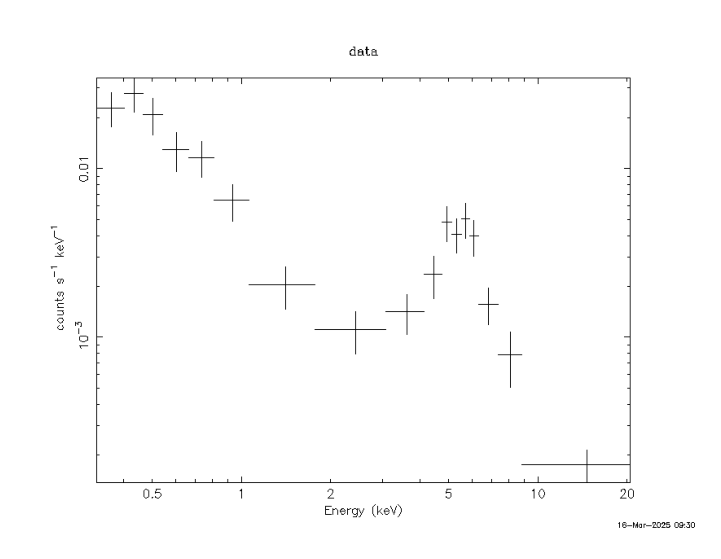

In [7]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*_E*_Spectrum.png')[0])
plt.imshow(img)
plt.axis('off')

### Black body model
**tbabs :**

In [7]:
AllModels.clear()
mo = Model("tbabs*bbody")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
plt.show()
nH_bbody = mo.TBabs.nH.values[0]


Model TBabs<1>*bbody<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bbody      kT         keV      3.00000      +/-  0.0          
   3    2   bbody      norm                1.00000      +/-  0.0          
________________________________________________________________________

tbvabs Version 2.3
Cosmic absorption with grains and H2, modified from
Wilms, Allen, & McCray, 2000, ApJ 542, 914-924
Questions: Joern Wilms
joern.wilms@sternwarte.uni-erlangen.de
joern.wilms@fau.de

http://pulsar.sternwarte.uni-erlangen.de/wilms/research/tbabs/

PLEASE NOTICE:
To get the model described by the above paper
you will also have to set the abundances:
   abund wilm

Note that this routine ignores the current cross section setting
as it always HAS to use the Verner cross sections as a baseline.

Fit statistic  : Chi-Squared              8.188954e+10     using 11 bins.

Te

(-0.5, 857.5, 659.5, -0.5)

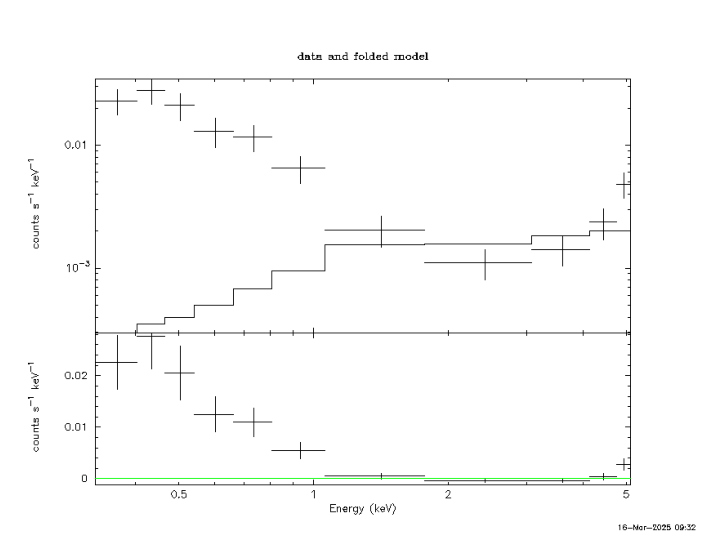

In [9]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*_E*_Spectrum_bbody.png')[0])
plt.imshow(img)
plt.axis('off')

**ztbabs :**

In [8]:
AllModels.clear()
moz = Model("ztbabs*bbody")
moz.zTBabs.Redshift = z
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_bbody_z = moz.zTBabs.nH.values[0]


Model zTBabs<1>*bbody<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   zTBabs     nH         10^22    1.00000      +/-  0.0          
   2    1   zTBabs     Redshift            0.0          frozen
   3    2   bbody      kT         keV      3.00000      +/-  0.0          
   4    2   bbody      norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              8.180320e+10     using 11 bins.

Test statistic : Chi-Squared              8.180320e+10     using 11 bins.
 Null hypothesis probability of 0.000000e+00 with 8 degrees of freedom
 Current data and model not fit yet.

Fit statistic  : Chi-Squared              9.095398e+10     using 11 bins.

Test statistic : Chi-Squared              9.095398e+10     using 11 bins.
 Null hypothesis probability of 0.000000e+00 with 8 degrees of freedom
 Current data and model not fit yet.
          

(-0.5, 857.5, 661.5, -0.5)

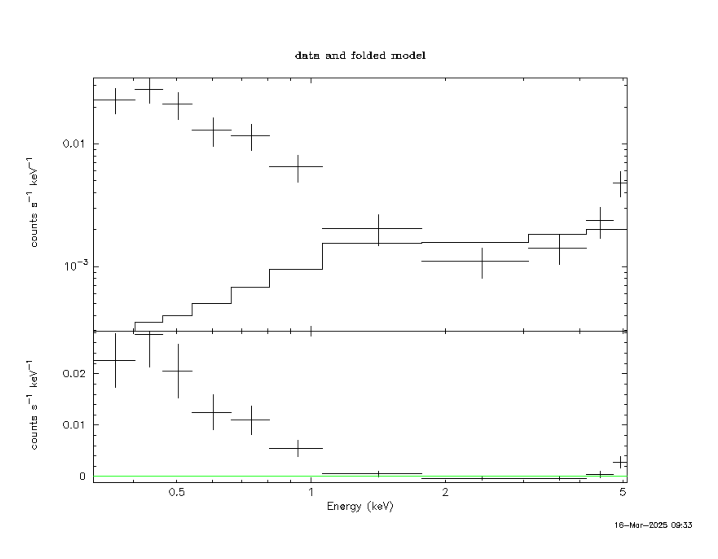

In [11]:
img = plt.imread(glob.glob("ObsID*SRCNUM*E*Spectrum_bbody_z.png")[0])
plt.imshow(img)
plt.axis('off')

### Bremsstrahlung model
**tbabs :**

In [9]:
AllModels.clear()
mo = Model("tbabs*bremss")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_bremss = mo.TBabs.nH.values[0]


Model TBabs<1>*bremss<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bremss     kT         keV      7.00000      +/-  0.0          
   3    2   bremss     norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              1.147809e+10     using 11 bins.

Test statistic : Chi-Squared              1.147809e+10     using 11 bins.
 Null hypothesis probability of 0.000000e+00 with 8 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        3:norm
125.507      0.580026      0      0.943181       13.0738   5.94709e-05
114.651      11720.6      -1      0.228143       198.689   5.52616e-05
104.634      87274.2      -1      0.113670       199.156   5.24602e-05
1

(-0.5, 857.5, 664.5, -0.5)

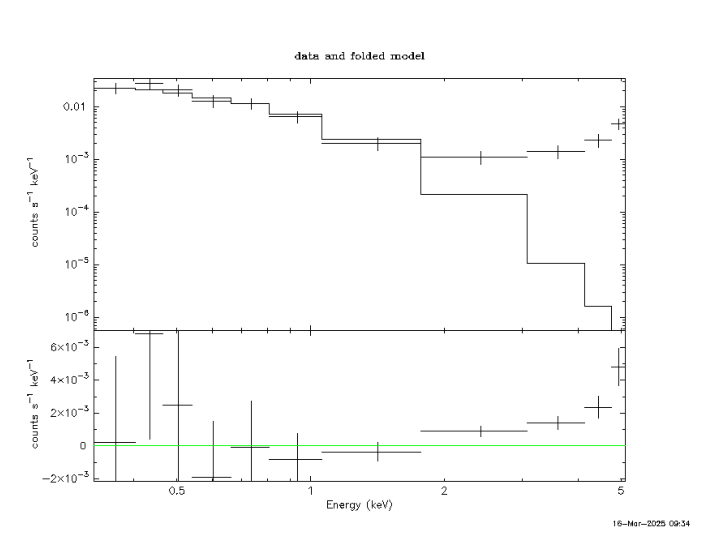

In [13]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*_E*_Spectrum_bremss.png')[0])
plt.imshow(img)
plt.axis('off')

**ztbabs :**

In [27]:
AllModels.clear()
moz = Model("ztbabs*bremss")
moz.zTBabs.Redshift = z
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_bremss_z = moz.zTBabs.nH.values[0]


Model zTBabs<1>*bremss<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   zTBabs     nH         10^22    1.00000      +/-  0.0          
   2    1   zTBabs     Redshift            0.0          frozen
   3    2   bremss     kT         keV      7.00000      +/-  0.0          
   4    2   bremss     norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              1.141226e+10     using 11 bins.

Test statistic : Chi-Squared              1.141226e+10     using 11 bins.
 Null hypothesis probability of 0.000000e+00 with 8 degrees of freedom
 Current data and model not fit yet.

Fit statistic  : Chi-Squared              1.555532e+10     using 11 bins.

Test statistic : Chi-Squared              1.555532e+10     using 11 bins.
 Null hypothesis probability of 0.000000e+00 with 8 degrees of freedom
 Current data and model not fit yet.
         

(-0.5, 856.5, 661.5, -0.5)

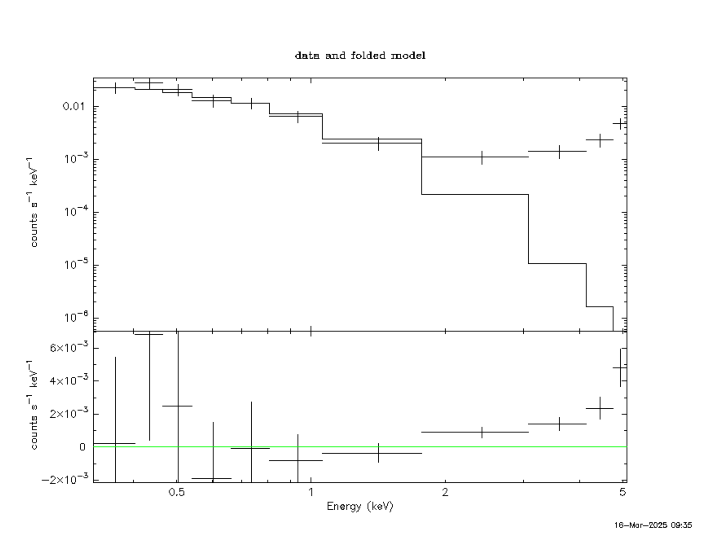

In [15]:
img = plt.imread(glob.glob("ObsID*SRCNUM*E*Spectrum_bremss_z.png")[0])
plt.imshow(img)
plt.axis('off')

### Apec model
**tbabs :**

In [10]:
AllModels.clear()
mo = Model("tbabs*apec")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_apec = mo.TBabs.nH.values[0]


Model TBabs<1>*apec<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   apec       kT         keV      1.00000      +/-  0.0          
   3    2   apec       Abundanc            1.00000      frozen
   4    2   apec       Redshift            0.0          frozen
   5    2   apec       norm                1.00000      +/-  0.0          
________________________________________________________________________

Reading APEC data from 3.0.9


Fit statistic  : Chi-Squared              2.848347e+09     using 11 bins.

Test statistic : Chi-Squared              2.848347e+09     using 11 bins.
 Null hypothesis probability of 0.000000e+00 with 8 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        5:norm
128.213      2.50711       0      0.989175      0.839135   0

(-0.5, 857.5, 656.5, -0.5)

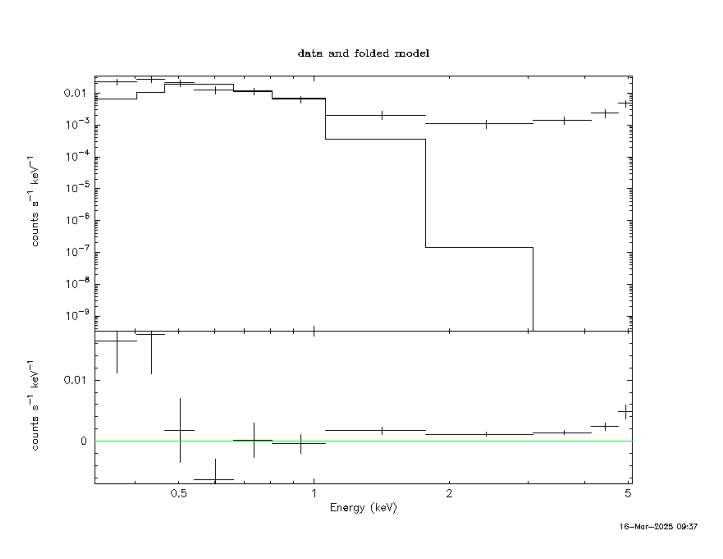

In [17]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*_E*_Spectrum_apec.png')[0])
plt.imshow(img)
plt.axis('off')

**ztbabs :**

In [11]:
AllModels.clear()
moz = Model("ztbabs*apec")
moz.zTBabs.Redshift = z
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_apec_z = moz.zTBabs.nH.values[0]


Model zTBabs<1>*apec<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   zTBabs     nH         10^22    1.00000      +/-  0.0          
   2    1   zTBabs     Redshift            0.0          frozen
   3    2   apec       kT         keV      1.00000      +/-  0.0          
   4    2   apec       Abundanc            1.00000      frozen
   5    2   apec       Redshift            0.0          frozen
   6    2   apec       norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              2.770854e+09     using 11 bins.

Test statistic : Chi-Squared              2.770854e+09     using 11 bins.
 Null hypothesis probability of 0.000000e+00 with 8 degrees of freedom
 Current data and model not fit yet.

Fit statistic  : Chi-Squared              6.450938e+09     using 11 bins.

Test statistic : Chi-Squared              6.450938e+09     using 11

(-0.5, 857.5, 657.5, -0.5)

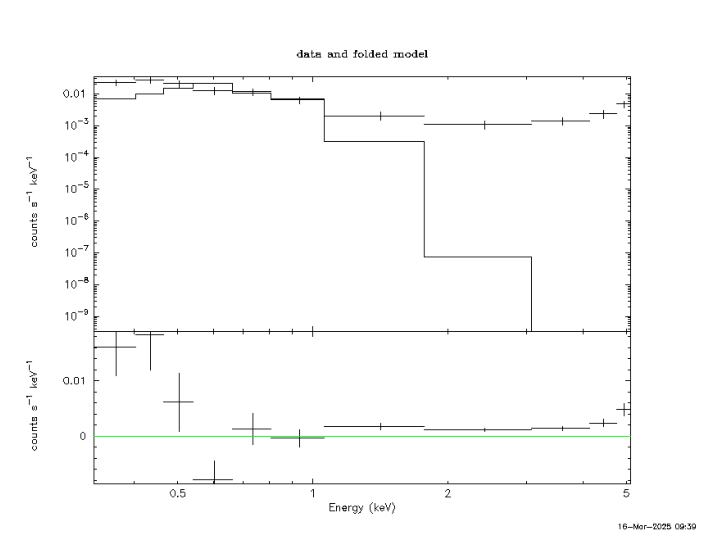

In [19]:
img = plt.imread(glob.glob("ObsID*SRCNUM*E*Spectrum_apec_z.png")[0])
plt.imshow(img)
plt.axis('off')

### Powerlaw model

In [12]:
AllModels.clear()
mo = Model("tbabs*powerlaw")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_powerlaw = mo.TBabs.nH.values[0]


Model TBabs<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   powerlaw   PhoIndex            1.00000      +/-  0.0          
   3    2   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              4.769290e+10     using 11 bins.

Test statistic : Chi-Squared              4.769290e+10     using 11 bins.
 Null hypothesis probability of 0.000000e+00 with 8 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH    2:PhoIndex        3:norm
117.97       1.24151      -1      0.646468      0.648519   1.95103e-05
116.107      90058.6      -1      0.313318      0.192278   9.42274e-06
101.617      465814        0     0.0623674     0.0648655   9.83175e-06

(-0.5, 856.5, 656.5, -0.5)

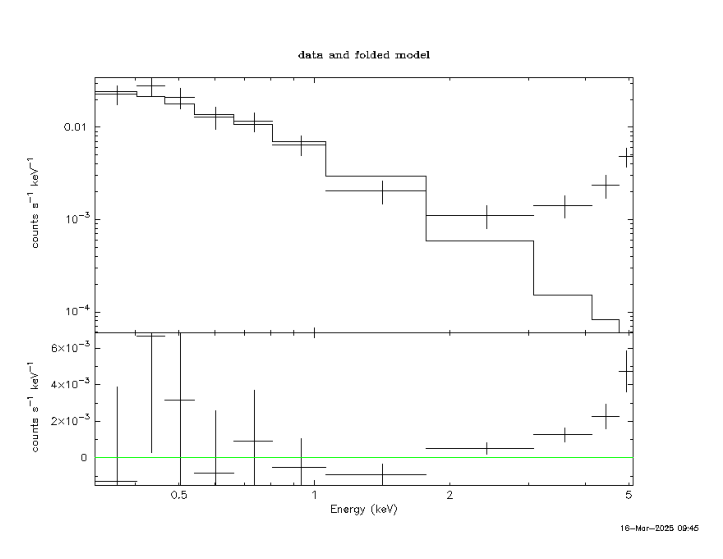

In [22]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*_E*_Spectrum_powerlaw.png')[0])
plt.imshow(img)
plt.axis('off')

**ztbabs :**

In [13]:
AllModels.clear()
moz = Model("ztbabs*powerlaw")
moz.zTBabs.Redshift = z
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_powerlaw_z = moz.zTBabs.nH.values[0]


Model zTBabs<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   zTBabs     nH         10^22    1.00000      +/-  0.0          
   2    1   zTBabs     Redshift            0.0          frozen
   3    2   powerlaw   PhoIndex            1.00000      +/-  0.0          
   4    2   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              4.751127e+10     using 11 bins.

Test statistic : Chi-Squared              4.751127e+10     using 11 bins.
 Null hypothesis probability of 0.000000e+00 with 8 degrees of freedom
 Current data and model not fit yet.

Fit statistic  : Chi-Squared              6.009812e+10     using 11 bins.

Test statistic : Chi-Squared              6.009812e+10     using 11 bins.
 Null hypothesis probability of 0.000000e+00 with 8 degrees of freedom
 Current data and model not fit yet.
       

(-0.5, 855.5, 656.5, -0.5)

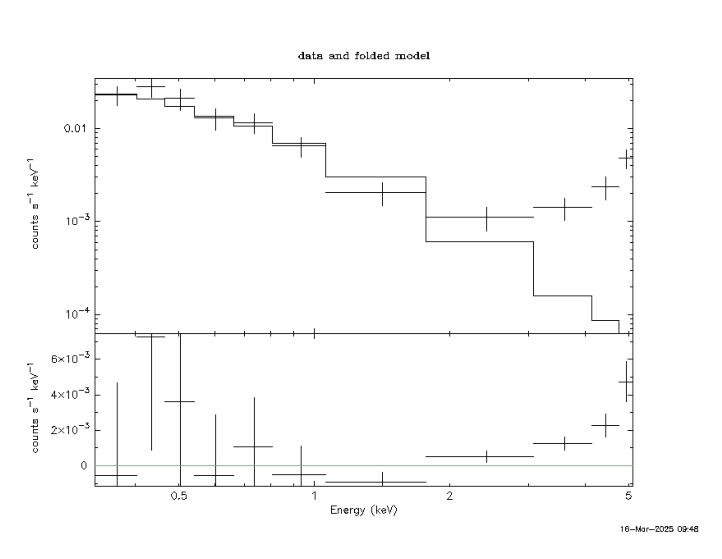

In [24]:
img = plt.imread(glob.glob("ObsID*SRCNUM*E*Spectrum_powerlaw_z.png")[0])
plt.imshow(img)
plt.axis('off')

### Black body + Powerlaw model
**tbabs :**

In [14]:
AllModels.clear()
mo = Model("tbabs*(bbody+powerlaw)")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_bbodypowerlaw = mo.TBabs.nH.values[0]


Model TBabs<1>(bbody<2> + powerlaw<3>) Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bbody      kT         keV      3.00000      +/-  0.0          
   3    2   bbody      norm                1.00000      +/-  0.0          
   4    3   powerlaw   PhoIndex            1.00000      +/-  0.0          
   5    3   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              2.431446e+11     using 11 bins.

Test statistic : Chi-Squared              2.431446e+11     using 11 bins.
 Null hypothesis probability of 0.000000e+00 with 6 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        3:norm    4:PhoIndex        5:norm
105.672      7883.87  

(-0.5, 856.5, 661.5, -0.5)

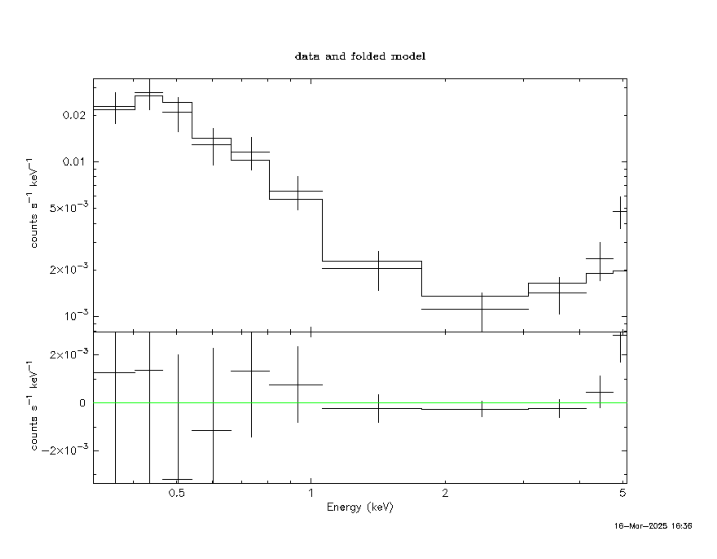

In [15]:
img = plt.imread(glob.glob("ObsID*SRCNUM*E*Spectrum_bbodypowerlaw.png")[0])
plt.imshow(img)
plt.axis('off')

**ztbabs :**

In [16]:
AllModels.clear()
moz = Model("ztbabs*(bbody+powerlaw)")
moz.zTBabs.Redshift = z
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_bbodypowerlaw_z = moz.zTBabs.nH.values[0]


Model zTBabs<1>(bbody<2> + powerlaw<3>) Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   zTBabs     nH         10^22    1.00000      +/-  0.0          
   2    1   zTBabs     Redshift            0.0          frozen
   3    2   bbody      kT         keV      3.00000      +/-  0.0          
   4    2   bbody      norm                1.00000      +/-  0.0          
   5    3   powerlaw   PhoIndex            1.00000      +/-  0.0          
   6    3   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              2.426444e+11     using 11 bins.

Test statistic : Chi-Squared              2.426444e+11     using 11 bins.
 Null hypothesis probability of 0.000000e+00 with 6 degrees of freedom
 Current data and model not fit yet.

Fit statistic  : Chi-Squared              2.837207e+11     using 11 bins.

Test statistic : Chi-Square

(-0.5, 856.5, 659.5, -0.5)

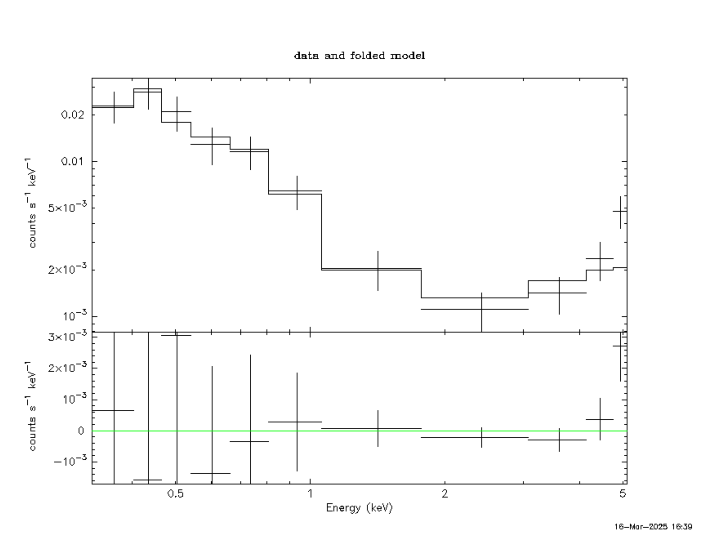

In [17]:
img = plt.imread(glob.glob("ObsID*SRCNUM*E*Spectrum_bbodypowerlaw_z.png")[0])
plt.imshow(img)
plt.axis('off')

### Bremss + Powerlaw model
**tbabs :**

In [18]:
AllModels.clear()
mo = Model("tbabs*(bremss+powerlaw)")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_bremsspowerlaw = mo.TBabs.nH.values[0]


Model TBabs<1>(bremss<2> + powerlaw<3>) Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bremss     kT         keV      7.00000      +/-  0.0          
   3    2   bremss     norm                1.00000      +/-  0.0          
   4    3   powerlaw   PhoIndex            1.00000      +/-  0.0          
   5    3   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              1.050913e+11     using 11 bins.

Test statistic : Chi-Squared              1.050913e+11     using 11 bins.
 Null hypothesis probability of 0.000000e+00 with 6 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        3:norm    4:PhoIndex        5:norm
106.152      7401    

(-0.5, 847.5, 656.5, -0.5)

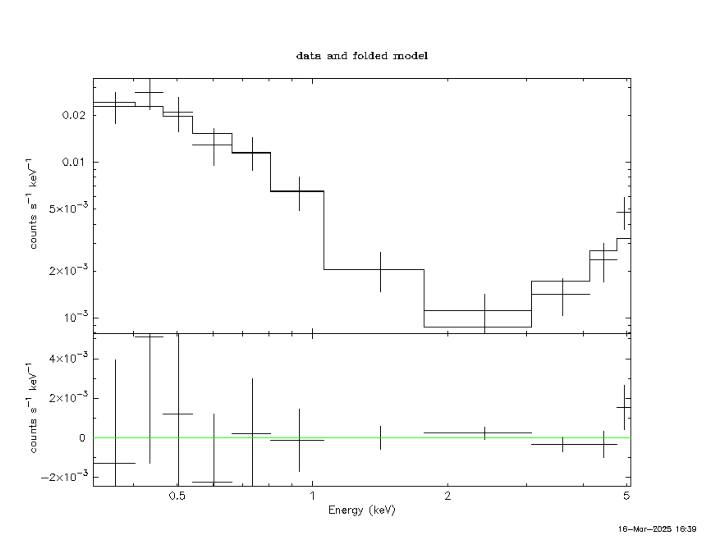

In [19]:
img = plt.imread(glob.glob("ObsID*SRCNUM*E*Spectrum_bremsspowerlaw.png")[0])
plt.imshow(img)
plt.axis('off')

**ztbabs :**

In [20]:
AllModels.clear()
moz = Model("ztbabs*(bremss+powerlaw)")
moz.zTBabs.Redshift = z
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_bremsspowerlaw_z = moz.zTBabs.nH.values[0]


Model zTBabs<1>(bremss<2> + powerlaw<3>) Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   zTBabs     nH         10^22    1.00000      +/-  0.0          
   2    1   zTBabs     Redshift            0.0          frozen
   3    2   bremss     kT         keV      7.00000      +/-  0.0          
   4    2   bremss     norm                1.00000      +/-  0.0          
   5    3   powerlaw   PhoIndex            1.00000      +/-  0.0          
   6    3   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              1.046265e+11     using 11 bins.

Test statistic : Chi-Squared              1.046265e+11     using 11 bins.
 Null hypothesis probability of 0.000000e+00 with 6 degrees of freedom
 Current data and model not fit yet.

Fit statistic  : Chi-Squared              1.356470e+11     using 11 bins.

Test statistic : Chi-Squar

(-0.5, 856.5, 660.5, -0.5)

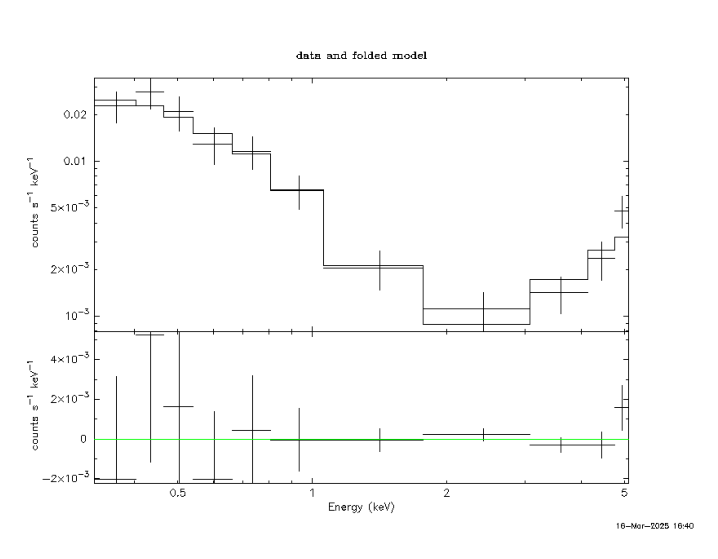

In [21]:
img = plt.imread(glob.glob("ObsID*SRCNUM*E*Spectrum_bremsspowerlaw_z.png")[0])
plt.imshow(img)
plt.axis('off')

### Apec + Apec model
**tbabs :**

In [22]:
AllModels.clear()
mo = Model("tbabs*(apec+apec)")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_apecapec = mo.TBabs.nH.values[0]


Model TBabs<1>(apec<2> + apec<3>) Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   apec       kT         keV      1.00000      +/-  0.0          
   3    2   apec       Abundanc            1.00000      frozen
   4    2   apec       Redshift            0.0          frozen
   5    2   apec       norm                1.00000      +/-  0.0          
   6    3   apec       kT         keV      1.00000      +/-  0.0          
   7    3   apec       Abundanc            1.00000      frozen
   8    3   apec       Redshift            0.0          frozen
   9    3   apec       norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              1.139480e+10     using 11 bins.

Test statistic : Chi-Squared              1.139480e+10     using 11 bins.
 Null hypothesis probability

(-0.5, 855.5, 656.5, -0.5)

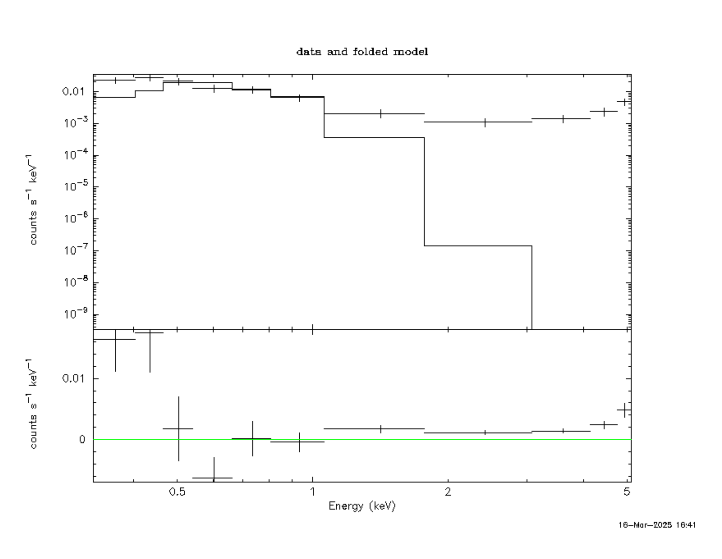

In [23]:
img = plt.imread(glob.glob("ObsID*SRCNUM*E*Spectrum_apecapec.png")[0])
plt.imshow(img)
plt.axis('off')

**ztbabs :**

In [24]:
AllModels.clear()
moz = Model("ztbabs*(apec+apec)")
moz.zTBabs.Redshift = z
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_apecapec_z = moz.zTBabs.nH.values[0]


Model zTBabs<1>(apec<2> + apec<3>) Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   zTBabs     nH         10^22    1.00000      +/-  0.0          
   2    1   zTBabs     Redshift            0.0          frozen
   3    2   apec       kT         keV      1.00000      +/-  0.0          
   4    2   apec       Abundanc            1.00000      frozen
   5    2   apec       Redshift            0.0          frozen
   6    2   apec       norm                1.00000      +/-  0.0          
   7    3   apec       kT         keV      1.00000      +/-  0.0          
   8    3   apec       Abundanc            1.00000      frozen
   9    3   apec       Redshift            0.0          frozen
  10    3   apec       norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              1.108480e+10     using 11 bins.

Test statistic : Chi-Squared          

(-0.5, 856.5, 659.5, -0.5)

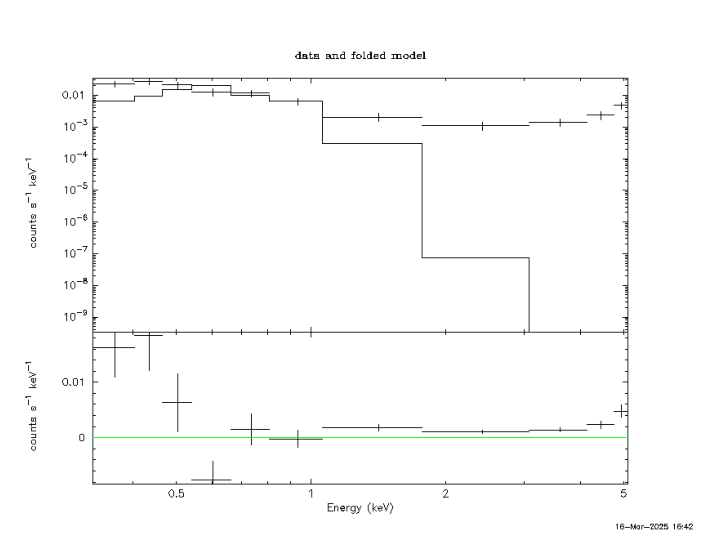

In [25]:
img = plt.imread(glob.glob("ObsID*SRCNUM*E*Spectrum_apecapec_z.png")[0])
plt.imshow(img)
plt.axis('off')

## Column density nH
### 3DNH-tool
http://astro.uni-tuebingen.de/nh3d/nhtool

**Sky coordinates (°) :** from ESASky

- RA = 52.1521261°
- Dec = -28.6988132°

52.15 -28.70

**Column density :** nH = 2*10^20 cm^-2

In [28]:
print("The different models give a column density of :")
print()
print(color.BOLD+"bbody"+color.END)
print(f"(tbabs) : {nH_bbody*10**22}")
print(f"(ztbabs) : {nH_bbody_z*10**22}")
print()
print(color.BOLD+"bremss"+color.END)
print(f"(tbabs) : {nH_bremss*10**22}")
print(f"(ztbabs) : {nH_bremss_z*10**22}")
print()
print(color.BOLD+"apec"+color.END)
print(f"(tbabs) : {nH_apec*10**22}")
print(f"(ztbabs) : {nH_apec_z*10**22}")
print()
print(color.BOLD+"powerlaw"+color.END)
print(f"(tbabs) : {nH_powerlaw*10**22}")
print(f"(ztbabs) : {nH_powerlaw_z*10**22}")
print()
print(color.BOLD+"bbody+powerlaw"+color.END)
print(f"(tbabs) : {nH_bbodypowerlaw*10**22}")
print(f"(ztbabs) : {nH_bbodypowerlaw_z*10**22}")
print()
print(color.BOLD+"bremss+powerlaw"+color.END)
print(f"(tbabs) : {nH_bremsspowerlaw*10**22}")
print(f"(ztbabs) : {nH_bremsspowerlaw_z*10**22}")
print()
print(color.BOLD+"apec+apec"+color.END)
print(f"(tbabs) : {nH_apecapec*10**22}")
print(f"(ztbabs) : {nH_apecapec_z*10**22}")

The different models give a column density of :

bbody
(tbabs) : 805809.7819488796
(ztbabs) : 518215.63636353135

bremss
(tbabs) : 448554.8906986048
(ztbabs) : 1871728.0245342208

apec
(tbabs) : 7.594123795855392e+21
(ztbabs) : 9.958196750795336e+21

powerlaw
(tbabs) : 1095858.3243445337
(ztbabs) : 2370538.0615202836

bbody+powerlaw
(tbabs) : 1.9823968208693093e+21
(ztbabs) : 4.894344313668285e+21

bremss+powerlaw
(tbabs) : 1.3145491486333449e+20
(ztbabs) : 3.758762372912835e+17

apec+apec
(tbabs) : 7.5976958446566e+21
(ztbabs) : 9.921037232651954e+21


## Flux
### X-ray flux

In [29]:
AllModels.calcFlux(".2 12.0")

 Model Flux 0.00015727 photons (1.1738e-13 ergs/cm^2/s) range (0.20000 - 12.000 keV)


In [32]:
Flux = 1.1738e-13 # ergs/cm^2/s
print(color.BOLD+"X-ray flux : "+color.END+f"F_X = {Flux} ergs/cm^2/s")

X-ray flux : F_X = 1.1738e-13 ergs/cm^2/s


### Optical flux

In [36]:
def F_optical(mag):
    F0 = 1.05*10**(-5) # GAIA zero point magnitude
    return F0*10**(-0.4*mag)

G1 = 20.6498
G2 = 20.9118

F1 = F_optical(G1)
F2 = F_optical(G2)

print(color.BOLD+"Optical  flux : "+color.END+f"F_opt1 = {F1} ergs/cm^2/s")
print(color.BOLD+"Optical  flux : "+color.END+f"F_opt2 = {F2} ergs/cm^2/s")

Optical  flux : F_opt1 = 5.771242179692641e-14 ergs/cm^2/s
Optical  flux : F_opt2 = 4.533872460198628e-14 ergs/cm^2/s


### X-ray flux / Optical flux ratio

In [37]:
print(color.BOLD+"X-ray flux / Optical flux ratio : "+color.END+f"F_x-ray/F_optical1 = {Flux/F1}")
print(f"F_x-ray = {Flux/F}*F_optical")
print(color.BOLD+"X-ray flux / Optical flux ratio : "+color.END+f"F_x-ray/F_optical2 = {Flux/F2}")
print(f"F_x-ray = {Flux/F}*F_optical")

X-ray flux / Optical flux ratio : F_x-ray/F_optical1 = 2.03387756648
F_x-ray = 0.03216657389730221*F_optical
X-ray flux / Optical flux ratio : F_x-ray/F_optical2 = 2.5889568140798036
F_x-ray = 0.03216657389730221*F_optical


## Luminosity

In [35]:
"""GLADE"""

d_kpc = 518655.2 # Distance en kpc
d_cm = d_kpc*3.0857*10**21 # Distance en cm, avec 1 pc = 3.0857*10^18 cm

# La source est supposée sphérique pour le calcul de la luminosité : L = 4*pi*F*D^2
Luminosity = 4*np.pi*Flux*(d_cm)**2 # erg/s

print(color.BOLD+"(GLADE)"+color.END)
print(f"Distance : {d_cm} cm")
print(f"Luminosité : {Luminosity} erg/s")

(GLADE)
Distance : 1.60041435064e+27 cm
Luminosité : 3.778059933821309e+42 erg/s
